<a href="https://colab.research.google.com/github/applejxd/colaboratory/blob/master/basic/matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# matplotlib のデモ

Colab 用に日本語対応の matplotlib を入れる

In [1]:
%%capture
!pip install japanize-matplotlib

In [2]:
import matplotlib.pyplot as plt
import japanize_matplotlib

# colab 以外・pip を使わない場合での日本語対応
# 順に Windows, Ubuntu 16.04, Ubuntu 18.04 以降
# plt.rcParams["font.family"] = ["MS Gothic", "TakaoGothic", "Noto Sans CJK JP"]

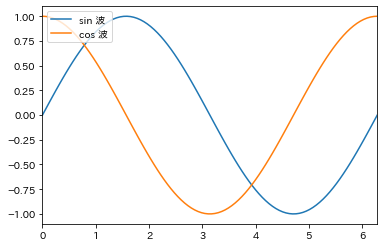

<Figure size 432x288 with 0 Axes>

In [3]:
import numpy as np

x = np.linspace(0, 2*np.pi, 100)

plt.plot(x, np.sin(x), label="sin 波")
plt.plot(x, np.cos(x), label="cos 波")
plt.legend(loc="upper left")
plt.xlim([0, 2*np.pi])
plt.ylim([-1.1, 1.1])
plt.show()

# dpi で画質向上
plt.savefig("./plot.png", dpi=300)

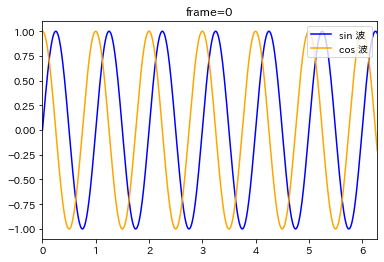

In [6]:
# インタラクティブ対応
# %matplotlib notebook
import matplotlib.animation as animation

# 変数の設定
frame_num = 100
t_start, t_end = 0, 10
wave_length = 1
velocity = 0.5

# 描画キャンバスを初期化
plt.close()
fig, ax = plt.subplots()

# 共通設定・初期設定
x = np.linspace(0, 2*np.pi, 1000)
ax.set_xlim([0, 2*np.pi])
ax.set_ylim([-1.1, 1.1])
line_1, = ax.plot([], [], c='blue', label="sin 波")
line_2, = ax.plot([], [], c='orange', label="cos 波")
ax.legend(loc="upper right")

# 更新の関数
def animate(frame):
    time = t_start + (t_end - t_start) / frame_num * frame
    ax.set_title(f"frame={frame}")
    line_1.set_data(x, np.sin(2*np.pi/wave_length*(x-velocity*time)))
    line_2.set_data(x, np.cos(2*np.pi/wave_length*(x-velocity*time)))
    return (line_1, line_2)

ani = animation.FuncAnimation(fig, animate, frames=frame_num, interval=100)
ani.save("./animation.gif", writer="pillow", dpi=300)

Colab では javascript で動画を描画

In [7]:
from matplotlib import rc
from IPython.display import HTML

rc('animation', html='jshtml')
ani